# Body Summary - Body Health

## Dataset y libraries

### Library imports

In [27]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime
from datetime import timedelta
from gettext import install
from tqdm import tqdm
import time

### Data import

In [28]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/summary/body_summary.json') as file:
    data = json.load(file)
    

## Body Summary

### Body Metrics

In [29]:
# Extract Body Metrics
waist_circumference = data['body_health']['summary']['body_summary']['body_metrics']['waist_circumference_cm_int']
hip_circumference = data['body_health']['summary']['body_summary']['body_metrics']['hip_circumference_cm_int']
chest_circumference = data['body_health']['summary']['body_summary']['body_metrics']['chest_circumference_cm_int']
bone_composition = data['body_health']['summary']['body_summary']['body_metrics']['bone_composition_percentage_int']
muscle_composition = data['body_health']['summary']['body_summary']['body_metrics']['muscle_composition_percentage_int']
water_composition = data['body_health']['summary']['body_summary']['body_metrics']['water_composition_percentage_int']
weight = data['body_health']['summary']['body_summary']['body_metrics']['weight_kg_float']
height = data['body_health']['summary']['body_summary']['body_metrics']['height_cm_int']
bmi = data['body_health']['summary']['body_summary']['body_metrics']['bmi_float']

# Check Waist Circumference
if waist_circumference is None:
    waist_circumference_result = "Waist Circunference: No values ​​were obtained or it is null."

else:
    waist_circumference_result = f"Waist Circunference: {waist_circumference} cm."
    
# Check Hip Circumference
if hip_circumference is None:
    hip_circumference_result = "Hip Circunference: No values ​​were obtained or it is null."

else:
    hip_circumference_result = f"Hip Circunference: {hip_circumference} cm."
    
# Check Chest Circumference
if chest_circumference is None:
    chest_circumference_result = "Chest Circunference: No values ​​were obtained or it is null."

else:
    chest_circumference_result = f"Chest Circunference: {chest_circumference} cm."
    
# Check Bone Composition
if bone_composition is None:
    bone_composition_result = "Bone Composition: No values ​​were obtained or it is null."

else:
    bone_composition_result = f"Bone Composition: {bone_composition}%."
    
# Check Muscle Composition
if muscle_composition is None:
    muscle_composition_result = "Muscle Composition: No values ​​were obtained or it is null."

else:
    muscle_composition_result = f"Muscle Composition: {muscle_composition}%."
    
# Check Water Composition
if water_composition is None:
    water_composition_result = "Water Composition: No values ​​were obtained or it is null."

else:
    water_composition_result = f"Water Composition: {water_composition}%."

# Check weight
if weight is None:
    weight_result = "Weight: No values ​​were obtained or it is null."

else:
    weight_result = f"Weight: {weight} kg."

# Check height    
if height is None:
    height_result = "Height: No values ​​were obtained or it is null."

else:
    height_meters = round(height/100, 2)
    height_result = f"Height: {height_meters} m."
    
# Check BMI    
if bmi is None:
    if weight is not None and weight > 0 and height is not None and height > 0:
        height_meters = height / 100
        bmi = weight / (height_meters ** 2)
        if bmi < 18.5:
            bmi_result = f"BMI: {bmi:.2f}. Is Underweight."
        elif bmi < 25:
            bmi_result = f"BMI: {bmi:.2f}. Is Normal."
        elif bmi < 30:
            bmi_result = f"BMI: {bmi:.2f}. Is Overweight."
        elif bmi < 35:
            bmi_result = f"BMI: {bmi:.2f}. Is Obese."
        else:
            bmi_result = f"BMI: {bmi:.2f}. Is Extremelly Obese"
    else:
        bmi_result = "BMI: No values ​​were obtained or it is null."
    

else:
    if bmi < 18.5:
        bmi_result = f"BMI: {bmi}. Is Underweight."
    elif bmi < 25:
        bmi_result = f"BMI: {bmi}. Is Normal."
    elif bmi < 30:
        bmi_result = f"BMI: {bmi}. Is Overweight."
    elif bmi < 35:
        bmi_result = f"BMI: {bmi}. Is Obese."
    else:
        bmi_result = f"BMI: {bmi}. Is "
    

# Print
print(waist_circumference_result)
print(hip_circumference_result)
print(chest_circumference_result)
print(bone_composition_result)
print(muscle_composition_result)
print(water_composition_result)
print(weight_result)
print(height_result)
print(bmi_result)



Waist Circunference: No values ​​were obtained or it is null.
Hip Circunference: No values ​​were obtained or it is null.
Chest Circunference: No values ​​were obtained or it is null.
Bone Composition: No values ​​were obtained or it is null.
Muscle Composition: No values ​​were obtained or it is null.
Water Composition: No values ​​were obtained or it is null.
Weight: 66.0 kg.
Height: 1.7 m.
BMI: 22.0. Is Normal.


### Blood Glucose

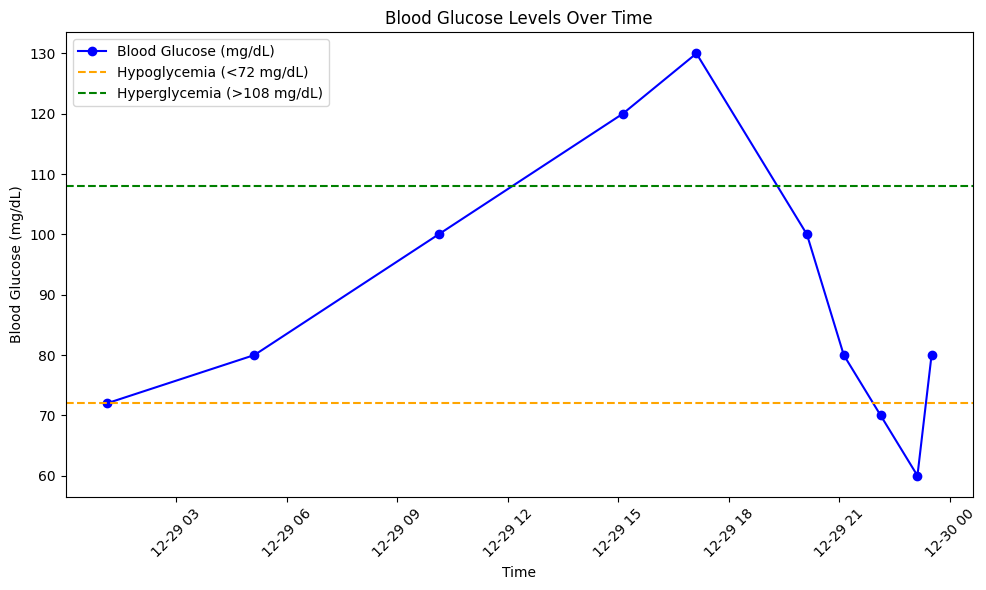

Blood Glucose Average: 89.2 mg/dL 
Min Blood Glucose: 60 mg/dL
Max Blood Glucose: 130 mg/dL


In [30]:
# Extract Blood Glucose
blood_glucose_avg = data['body_health']['summary']['body_summary']['blood_glucose']['blood_glucose_avg_mg_per_dL_int']
blood_glucose_granular = data['body_health']['summary']['body_summary']['blood_glucose']['blood_glucose_granular_data_array']

# Check if there is data in blood_glucose_granular_data_array
if blood_glucose_granular:
    # Convert data to a DataFrame
    blood_glucose_granular_df = pd.DataFrame(blood_glucose_granular)
    blood_glucose_granular_df['datetime'] = pd.to_datetime(blood_glucose_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(blood_glucose_granular_df['datetime'], blood_glucose_granular_df['blood_glucose_mg_per_dL_int'], marker='o', color='b', label='Blood Glucose (mg/dL)')

    # Add the glucose level lines
    plt.axhline(y=72, color='orange', linestyle='--', label='Hypoglycemia (<72 mg/dL)')
    plt.axhline(y=108, color='green', linestyle='--', label='Hyperglycemia (>108 mg/dL)')

    # Setting up labels and title
    plt.title('Blood Glucose Levels Over Time')
    plt.xlabel('Time')
    plt.ylabel('Blood Glucose (mg/dL)')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the graphic
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Blood Glucose Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# Check Blood Glucose Average
if not blood_glucose_avg and not blood_glucose_granular:
    blood_glucose_avg_result = "Blood Glucose Average: No values ​​were obtained or it is null."

elif not blood_glucose_avg:
    blood_glucose_avg_granular = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].mean()
    blood_glucose_avg_result = f"Blood Glucose Average: {blood_glucose_avg_granular} mg/dL "

else:
    blood_glucose_avg_result = f"Blood Glucose Average: {blood_glucose_avg} mg/dL "
    
# Get the minimum and maximum glucose values ​​of the DataFrame
if blood_glucose_granular:
    min_glucose = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].min()
    min_glucose_result = f"Min Blood Glucose: {min_glucose} mg/dL"
    max_glucose = blood_glucose_granular_df['blood_glucose_mg_per_dL_int'].max()
    max_glucose_result = f"Max Blood Glucose: {max_glucose} mg/dL"
else:
    min_glucose_result = 'Min Blood Glucose: No values ​​were obtained or it is null.'
    max_glucose_result = 'Max Blood Glucose: No values ​​were obtained or it is null.'

print(blood_glucose_avg_result)
print(min_glucose_result)
print(max_glucose_result)

### Blood Pressure

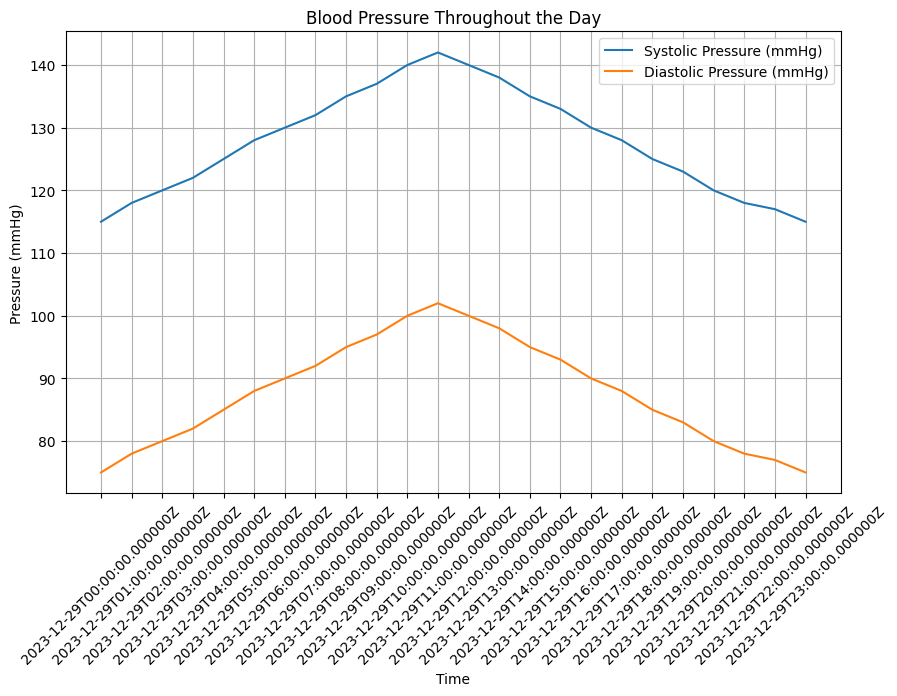

Blood Pressure Average: Systolic 120 mmHg - Diastolic 80 mmHg
Blood Pressure Systolic: 115 mmHg - 142 mmHg
Blood Pressure Diastolic: 75 mmHg - 102 mmHg


In [31]:
# Extract Blood Pressure
blood_pressure_avg = data['body_health']['summary']['body_summary']['blood_pressure']['blood_pressure_avg_object']
blood_pressure_granular = data['body_health']['summary']['body_summary']['blood_pressure']['blood_pressure_granular_data_array']

# Check if there is data in blood_pressure_granular_data_array
if blood_pressure_granular:
    # Convert data to a DataFrame
    blood_pressure_granular_df = pd.DataFrame(blood_pressure_granular)
    blood_pressure_granular_df['datetime'] = pd.to_datetime(blood_pressure_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(blood_pressure_granular_df["datetime_string"], blood_pressure_granular_df["systolic_mmHg_int"], label="Systolic Pressure (mmHg)")
    plt.plot(blood_pressure_granular_df["datetime_string"], blood_pressure_granular_df["diastolic_mmHg_int"], label="Diastolic Pressure (mmHg)")


    # Setting up labels and title
    plt.title("Blood Pressure Throughout the Day")
    plt.xlabel("Time")
    plt.ylabel("Pressure (mmHg)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show the graphic
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, "Blood Pressure Chart: No granular data available", 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# Convert data Average to a DataFrame
if blood_pressure_avg:  # Ensure blood_pressure_avg is not empty before converting
    blood_pressure_avg_df = pd.DataFrame([blood_pressure_avg])  # Wrap the dictionary in a list to create a DataFrame
    
# Check Blood Pressure Average
if not blood_pressure_avg and not blood_pressure_granular:
    blood_pressure_avg_result = "Blood Pressure Average: No values ​​were obtained or it is null."

elif not blood_pressure_avg:
    blood_pressure_avg_systolic = blood_pressure_granular_df["systolic_mmHg_int"].mean()
    blood_pressure_avg_diastolic = blood_pressure_granular_df["diastolic_mmHg_int"].mean()
    blood_pressure_avg_result = f"Blood Pressure Average: Systolic {blood_pressure_avg_systolic:.2f} mmHg - Diastolic {blood_pressure_avg_diastolic:.2f} mmHg"

else:
    blood_pressure_avg_systolic = blood_pressure_avg_df["systolic_mmHg_int"].iloc[0]
    blood_pressure_avg_diastolic = blood_pressure_avg_df["diastolic_mmHg_int"].iloc[0]
    blood_pressure_avg_result = f"Blood Pressure Average: Systolic {blood_pressure_avg_systolic} mmHg - Diastolic {blood_pressure_avg_diastolic} mmHg"

    
# Get the minimum and maximum pressure values ​​of the DataFrame
if blood_pressure_granular:
    min_pressure_systolic = blood_pressure_granular_df['systolic_mmHg_int'].min()
    max_pressure_systolic = blood_pressure_granular_df['systolic_mmHg_int'].max()
    pressure_systolic_result = f"Blood Pressure Systolic: {min_pressure_systolic} mmHg - {max_pressure_systolic} mmHg"
else:
    pressure_systolic_result = 'Blood Pressure Systolic: No values ​​were obtained or it is null.'
    
if blood_pressure_granular:
    min_pressure_diastolic = blood_pressure_granular_df['diastolic_mmHg_int'].min()
    max_pressure_diastolic = blood_pressure_granular_df['diastolic_mmHg_int'].max()
    pressure_diastolic_result = f"Blood Pressure Diastolic: {min_pressure_diastolic} mmHg - {max_pressure_diastolic} mmHg"
else:
    pressure_diastolic_result = 'Blood Pressure Diastolic: No values ​​were obtained or it is null.'

print(blood_pressure_avg_result)
print(pressure_systolic_result)
print(pressure_diastolic_result)
    

### Hydration

In [32]:
# Extract hydration
water_total_consumption = data['body_health']['summary']['body_summary']['hydration']['water_total_consumption_mL_int']
hydration_amount_granular = data['body_health']['summary']['body_summary']['hydration']['hydration_amount_granular_data_array']
hydration_level_granular = data['body_health']['summary']['body_summary']['hydration']['hydration_level_granular_data_array']

# Def the total water value
total_water_goal = 3000  # Subjective maximum value

def generate_progress(current, maximum):
    if current is None or maximum is None:
        return "Water Total: No values were obtained or it is null."
    # progress percent
    progress = current / maximum
    # progress bar
    progress = f"{int(progress * 100)}%"
    return progress

def generate_waterglass(current):
    if current is None:
        return "Hydration: No values were obtained or it is null."
    waterglass = current / 250
    return waterglass

# progress bar
progress = generate_progress(water_total_consumption, total_water_goal)
waterglass = generate_waterglass(water_total_consumption)

print(progress)
print(waterglass)

110%
13.2


### Heart Rate

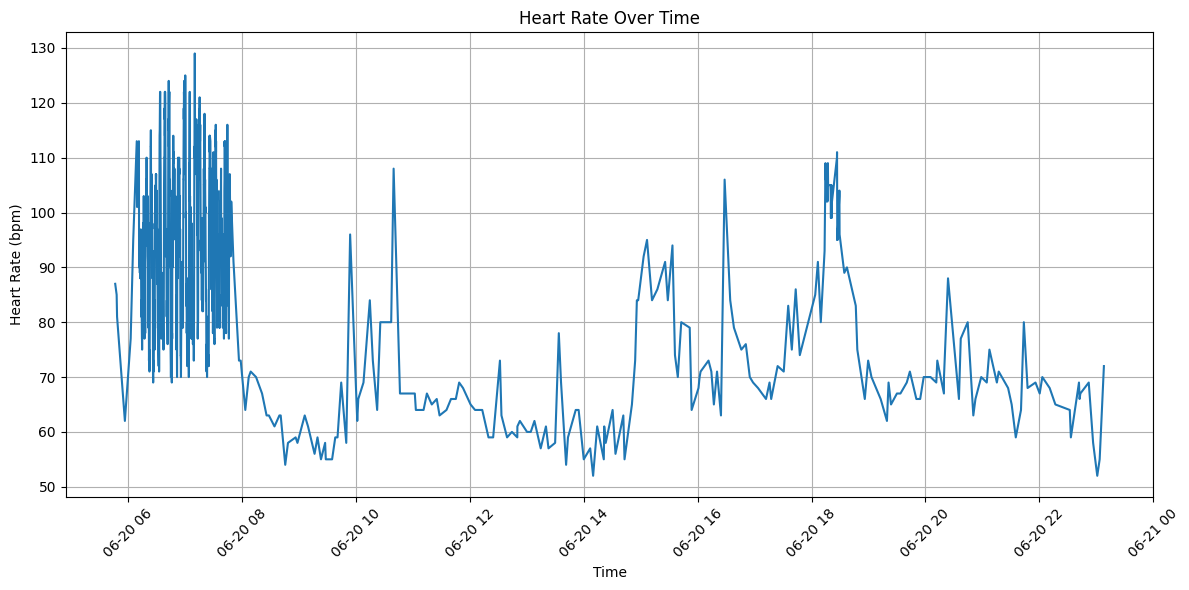

Heart Rate Average: 90 bpm.
Heart Rate Maximus: 129 bpm.
Heart Rate Minimus: 52 bpm.


In [33]:
hr_avg_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hr_avg_bpm_int']
hr_max_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hr_maximum_bpm_int']
hr_min_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hr_minimum_bpm_int']
hr_granular_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hr_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular_body_summary]
heart_rates = [item['hr_bpm_int'] for item in hr_granular_body_summary]

if hr_granular_body_summary:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Heart Reate Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

# HR avg
if hr_avg_body_summary is None:
    hr_avg_body_summary_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_body_summary_result = f'Heart Rate Average: {hr_avg_body_summary} bpm.'

# HR maximus
if hr_max_body_summary is None:
    hr_max_body_summary_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_body_summary_result = f'Heart Rate Maximus: {hr_max_body_summary} bpm.'
    
# HR minimus
if hr_min_body_summary is None:
    hr_min_body_summary_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_body_summary_result = f'Heart Rate Minimus: {hr_min_body_summary} bpm.'

print(hr_avg_body_summary_result)
print(hr_max_body_summary_result)
print(hr_min_body_summary_result)

### HRV

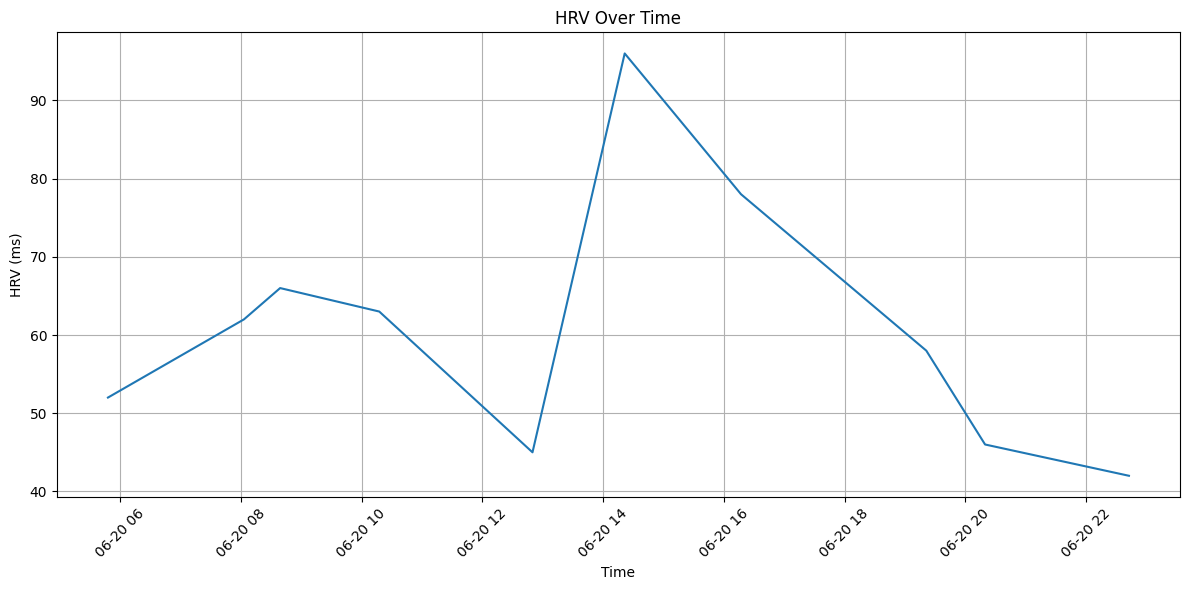

HRV Average: 61.0 bpm.


In [34]:
hrv_avg_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hrv_avg_sdnn_float']
hrv_granular_body_summary = data['body_health']['summary']['body_summary']['heart_rate']['hrv_sdnn_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hrv_granular_body_summary]
heart_rates = [item['hrv_sdnn_float'] for item in hrv_granular_body_summary]

if hrv_granular_body_summary:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('HRV Over Time')
    plt.xlabel('Time')
    plt.ylabel('HRV (ms)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'HRV Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# HRV avg
if hrv_avg_body_summary is None:
    hrv_avg_body_summary_result = "HRV Avg: No values ​​were obtained or it is null."
else:
    hrv_avg_body_summary_result = f'HRV Average: {hrv_avg_body_summary} bpm.'

print(hrv_avg_body_summary_result)

### Mood

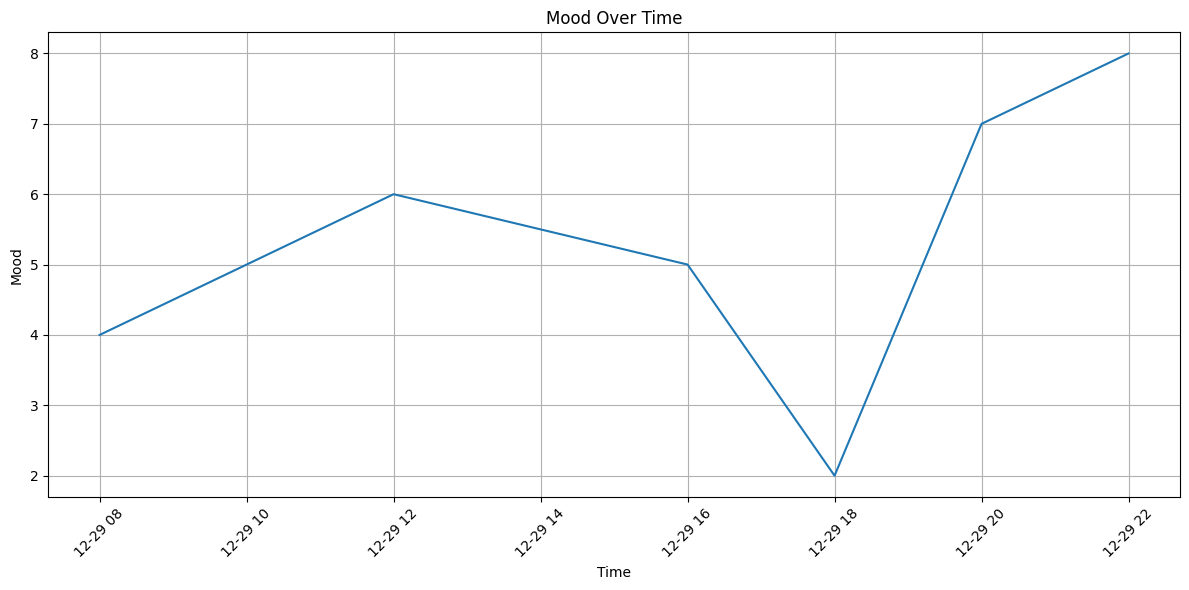

Heart Rate Average: 5.
Heart Rate Average: 5.
Heart Rate Minimus: 2.


In [35]:
mood_average = data['body_health']['summary']['body_summary']['mood']['mood_avg_scale_int']
mood_maximum = data['body_health']['summary']['body_summary']['mood']['mood_maximum_scale_int']
mood_minimum = data['body_health']['summary']['body_summary']['mood']['mood_minimum_scale_int']
mood_granular = data['body_health']['summary']['body_summary']['mood']['mood_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in mood_granular]
mood = [item['mood_scale_int'] for item in mood_granular]

if mood_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, mood, linestyle='-')
    plt.title('Mood Over Time')
    plt.xlabel('Time')
    plt.ylabel('Mood')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Mood chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

# mood avg
if mood_average is None:
    mood_average_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    mood_average_result = f'Heart Rate Average: {mood_average}.'

# Mood maximus
if mood_maximum is None:
    mood_maximum_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    mood_maximum_result = f'Heart Rate Maximus: {mood_maximum}.'
    
# Mood minimus
if mood_minimum is None:
    mood_minimum_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    mood_minimum_result = f'Heart Rate Minimus: {mood_minimum}.'

print(mood_average_result)
print(mood_average_result)
print(mood_minimum_result)

### Nutrition

In [36]:
# Extract Nutrion
food_intake = data['body_health']['summary']['body_summary']['nutrition']['food_intake_float']
calories_intake = data['body_health']['summary']['body_summary']['nutrition']['calories_intake_kcal_float']
protein_intake = data['body_health']['summary']['body_summary']['nutrition']['protein_intake_g_float']
sugar_intake = data['body_health']['summary']['body_summary']['nutrition']['sugar_intake_g_float']
fat_intake = data['body_health']['summary']['body_summary']['nutrition']['fat_intake_g_float']
trans_fat_intake = data['body_health']['summary']['body_summary']['nutrition']['trans_fat_intake_g_float']
carbohydrates_intake = data['body_health']['summary']['body_summary']['nutrition']['carbohydrates_intake_g_float']
fiber_intake = data['body_health']['summary']['body_summary']['nutrition']['fiber_intake_g_float']
alcohol_intake = data['body_health']['summary']['body_summary']['nutrition']['alcohol_intake_g_float']
sodium_intake = data['body_health']['summary']['body_summary']['nutrition']['sodium_intake_mg_float']
cholesterol_intake = data['body_health']['summary']['body_summary']['nutrition']['cholesterol_intake_mg_float']

# Check food
if food_intake is None:
    food_intake_result = "Food Intake: No values ​​were obtained or it is null."

else:
    food_intake_result = f"Food Intake: {food_intake}."
    
# Check calories
if calories_intake is None:
    calories_intake_result = "Calories Intake: No values ​​were obtained or it is null."

else:
    calories_intake_result = f"Calories Intake: {calories_intake} kcal."

# Check protein
if protein_intake is None:
    protein_intake_result = "Protein Intake: No values ​​were obtained or it is null."

else:
    protein_intake_result = f"Protein Intake: {protein_intake} g."

# Check sugar
if sugar_intake is None:
    sugar_intake_result = "Sugar Intake: No values ​​were obtained or it is null."

else:
    sugar_intake_result = f"Sugar Intake: {sugar_intake} g."

# Check fat
if fat_intake is None:
    fat_intake_result = "Fat Intake: No values ​​were obtained or it is null."

else:
    fat_intake_result = f"Fat Intake: {fat_intake} g."

# Check trans_fat
if trans_fat_intake is None:
    trans_fat_intake_result = "Trans Fat Intake: No values ​​were obtained or it is null."

else:
    trans_fat_intake_result = f"Trans Fat Intake: {trans_fat_intake} g."
    
# Check carbohydrates intake
if carbohydrates_intake is None:
    carbohydrates_intake_result = "Carbohydrates Intake: No values ​​were obtained or it is null."

else:
    carbohydrates_intake_result = f"Carbohydrates Intake: {carbohydrates_intake} g."
    
# Check Fiber
if fiber_intake is None:
    fiber_intake_result = "Fiber Intake: No values ​​were obtained or it is null."

else:
    fiber_intake_result = f"Fiber Intake: {fiber_intake} g."

# Check Alcohol
if alcohol_intake is None:
    alcohol_intake_result = "Alcohol Intake: No values ​​were obtained or it is null."

else:
    alcohol_intake_result = f"Alcohol Intake: {alcohol_intake} g."

# Check Sodium
if sodium_intake is None:
    sodium_intake_result = "Sodium Intake: No values ​​were obtained or it is null."

else:
    sodium_intake_result = f"Sodium Intake: {sodium_intake} g."

# Check Cholesterol
if cholesterol_intake is None:
    cholesterol_intake_result = "Cholesterol Intake: No values ​​were obtained or it is null."

else:
    cholesterol_intake_result = f"Cholesterol Intake: {cholesterol_intake} g."
    
print (food_intake_result)
print (calories_intake_result)
print (protein_intake_result)
print (sugar_intake_result)
print (fat_intake_result)
print (trans_fat_intake_result)
print (carbohydrates_intake_result)
print (fiber_intake_result)
print (alcohol_intake_result)
print (sodium_intake_result)
print (cholesterol_intake_result)

Food Intake: 3.5.
Calories Intake: 1800.0 kcal.
Protein Intake: 90.0 g.
Sugar Intake: 30.0 g.
Fat Intake: 60.0 g.
Trans Fat Intake: 1.0 g.
Carbohydrates Intake: 220.0 g.
Fiber Intake: 25.0 g.
Alcohol Intake: 5.0 g.
Sodium Intake: 2400.0 g.
Cholesterol Intake: 200.0 g.


### Oxygenation

Saturation Average: 97%
vo2max: 45 mL/min/kg


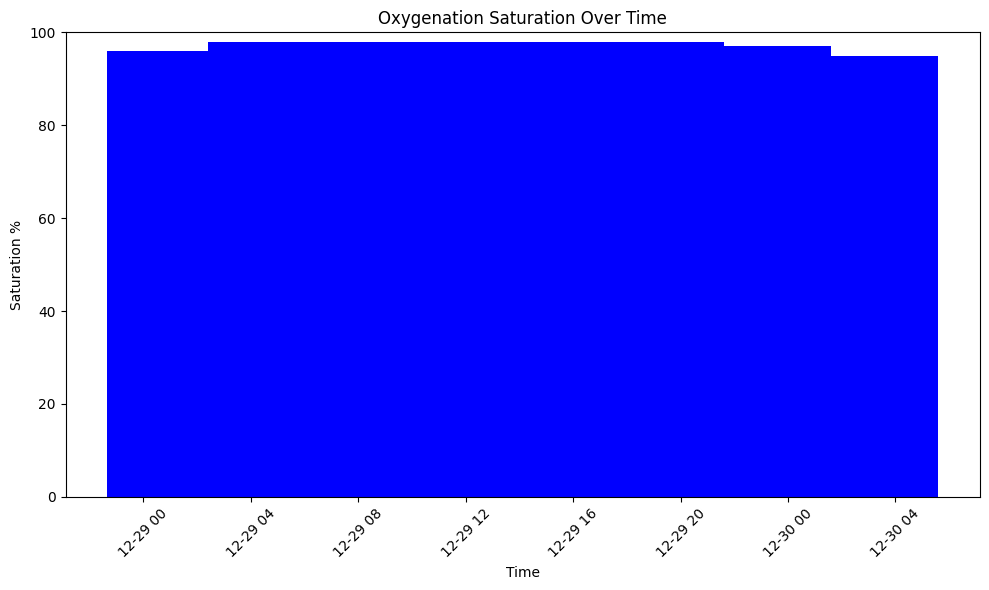

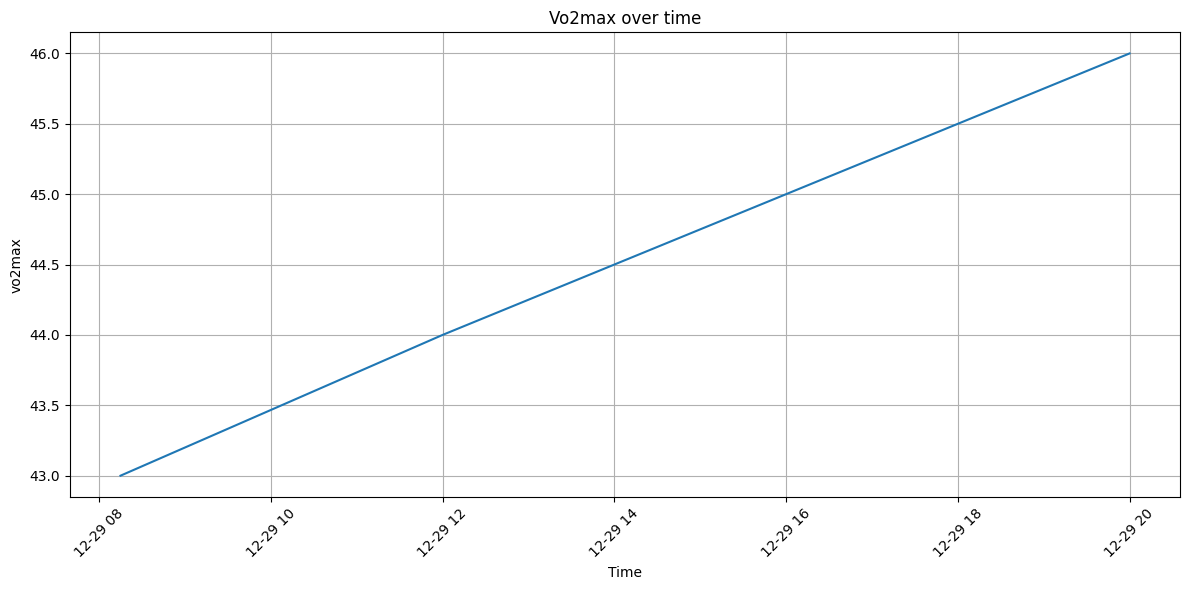

In [37]:
saturation_avg = data['body_health']['summary']['body_summary']['oxygenation']['saturation_avg_percentage_int']
saturation_granular = data['body_health']['summary']['body_summary']['oxygenation']['saturation_granular_data_array']
vo2max_ml = data['body_health']['summary']['body_summary']['oxygenation']['vo2max_mL_per_min_per_kg_int']
vo2max_granular = data['body_health']['summary']['body_summary']['oxygenation']['vo2_granular_data_array']

# Checking the average saturation value
if saturation_avg is not None and saturation_avg > 0:
    print(f"Saturation Average: {saturation_avg}%")
else:
    print("Saturation Average: No values were obtained or it is null")

# Checking the average saturation value
if vo2max_ml is not None and vo2max_ml > 0:
    print(f"vo2max: {vo2max_ml} mL/min/kg")
else:
    print("vo2max: No values were obtained or it is null")

# Creating a DataFrame for the granular data
if saturation_granular:
    df = pd.DataFrame(saturation_granular)
    df['datetime_string'] = pd.to_datetime(df['datetime_string'])
    
    # Plotting the bar chart for saturation
    plt.figure(figsize=(10, 6))
    plt.bar(df['datetime_string'], df['saturation_percentage_int'], color='blue', label='Saturation %')
    plt.ylim(0, 100)
    plt.title('Oxygenation Saturation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Saturation %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Saturation Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in vo2max_granular]
vo2max = [item['vo2_mL_per_min_per_kg_int'] for item in vo2max_granular]

if vo2max_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, vo2max, linestyle='-')
    plt.title('Vo2max over time')
    plt.xlabel('Time')
    plt.ylabel('vo2max')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'vo2max Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    


### Temperature

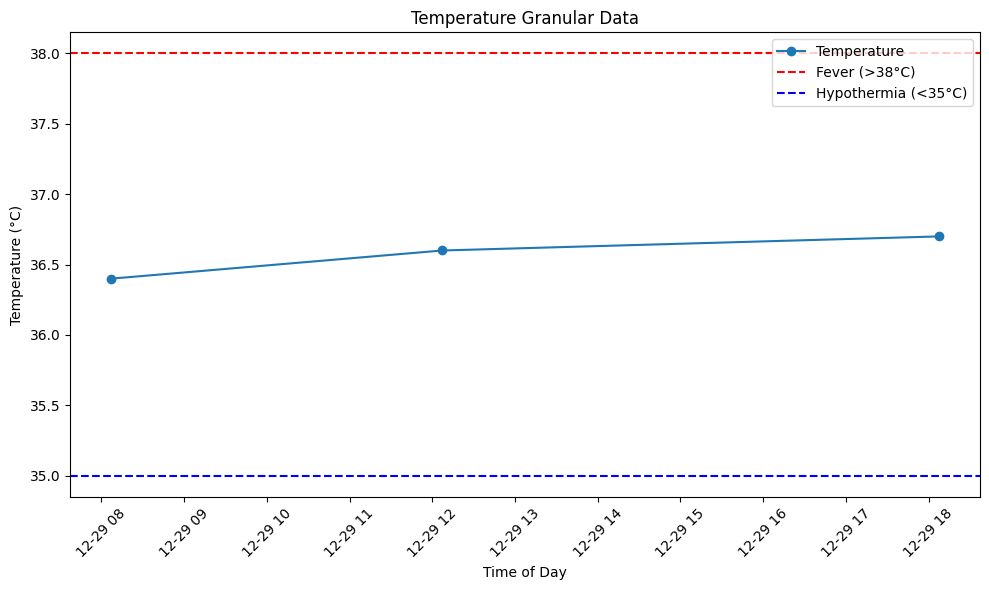

Temperature Average: 36.5 °C.
Temperature Maximum: 36.7 °C.
Temperature Minimum: 36.4 °C.


In [38]:
temperature_avg = data['body_health']['summary']['body_summary']['temperature']['temperature_avg_object']['temperature_celsius_float']
temperature_max = data['body_health']['summary']['body_summary']['temperature']['temperature_maximum_object']['temperature_celsius_float']
temperature_min = data['body_health']['summary']['body_summary']['temperature']['temperature_minimum_object']['temperature_celsius_float']
temperature_granular = data['body_health']['summary']['body_summary']['temperature']['temperature_granular_data_array']

if temperature_granular and 'datetime_string' in temperature_granular[0]:
    df = pd.DataFrame(temperature_granular)
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['temperature_celsius_float'], marker='o', linestyle='-', label='Temperature')
    plt.axhline(y=38, color='r', linestyle='--', label='Fever (>38°C)')
    plt.axhline(y=35, color='b', linestyle='--', label='Hypothermia (<35°C)')
    plt.title('Temperature Granular Data')
    plt.xlabel('Time of Day')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    # Mostrar un mensaje en lugar del gráfico si no hay información granular o falta el campo
    print("No granular data or 'datetime_string' not found in data.")
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Temperature Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

if temperature_avg is None:
    temperature_avg_result = "Temperature Average: No values ​​were obtained or it is null."
else:
    temperature_avg_result = f'Temperature Average: {temperature_avg} °C.'

# Temperature maximum
if temperature_max is None:
    temperature_max_result = "Temperature Maximum: No values ​​were obtained or it is null."
else:
    temperature_max_result = f'Temperature Maximum: {temperature_max} °C.'
    
# Temperature minimum
if temperature_min is None:
    temperature_min_result = "Temperature Minimum: No values ​​were obtained or it is null."
else:
    temperature_min_result = f'Temperature Minimum: {temperature_min} °C.'
    
print (temperature_avg_result)
print (temperature_max_result)
print (temperature_min_result)